# Работа с данными от Mercedes


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Солоухин Андрей 19АСв, 2 Вариант

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Wed Oct 20 15:45:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!export -p

declare -x CLICOLOR="1"
declare -x CLOUDSDK_CONFIG="/content/.config"
declare -x CLOUDSDK_PYTHON="python3"
declare -x COLAB_GPU="1"
declare -x CUDA_VERSION="11.1.1"
declare -x CUDNN_VERSION="8.0.5.39"
declare -x DATALAB_SETTINGS_OVERRIDES="{\"kernelManagerProxyPort\":6000,\"kernelManagerProxyHost\":\"172.28.0.3\",\"jupyterArgs\":[\"--ip=\\\"172.28.0.2\\\"\"],\"debugAdapterMultiplexerPath\":\"/usr/local/bin/dap_multiplexer\",\"enableLsp\":true}"
declare -x DEBIAN_FRONTEND="noninteractive"
declare -x ENV="/root/.bashrc"
declare -x GCE_METADATA_TIMEOUT="0"
declare -x GCS_READ_CACHE_BLOCK_SIZE_MB="16"
declare -x GIT_PAGER="cat"
declare -x GLIBCPP_FORCE_NEW="1"
declare -x GLIBCXX_FORCE_NEW="1"
declare -x HOME="/root"
declare -x HOSTNAME="01587774a986"
declare -x JPY_PARENT_PID="66"
declare -x LANG="en_US.UTF-8"
declare -x LAST_FORCED_REBUILD="20211007"
declare -x LD_LIBRARY_PATH="/usr/lib64-nvidia"
declare -x LD_PRELOAD="/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4"
declare -x LIBRARY_PATH="/

In [ ]:
#!ls "/content/drive/My Drive/"

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
rm -Rf /content/test_directory*

In [ ]:
!ls /content

drive  sample_data


Загрузка данных с Google Drive

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/train.csv")

Отображение загруженных данных

In [ ]:
data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Удаление столбца ID из набора данных

In [ ]:
features = data.drop(columns=['ID'])

In [ ]:
features

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
subdata = features.iloc[:, 1:9]

In [ ]:
subdata

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
subdata_encoded = subdata.apply(le.fit_transform)

In [ ]:
subdata_encoded

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [ ]:
subdata_2 = features.iloc[:, 9:385]

In [ ]:
subdata_2

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
subdata_encoded.reset_index(drop=True, inplace=True)
subdata_2.reset_index(drop=True, inplace=True)

In [ ]:
data_2 = pd.concat([subdata_encoded, subdata_2], axis = 1)

In [ ]:
data_2

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Нормировка данных так, чтобы среднее = 0, стандартное отклонение = 1

In [ ]:
# Среднее значение
mymean = data_2.mean(axis=0)
# Стандартное отклонение
mystd = data_2.std(axis=0)
data_2 -= mymean
data_2 /= mystd

In [ ]:
data_2

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.162993,1.393322,-0.028118,-1.678071,0.028935,1.291964,0.751698,0.339405,-0.116108,NaN,-0.284872,4.03065,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,19.533195,-0.30857,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,-4.237357,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,-1.749861,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
1,0.162993,1.158883,0.155369,0.620896,0.028935,1.776763,1.437340,0.339405,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,1.461457,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2,-0.710475,1.510542,1.531527,-0.528587,0.028935,1.655563,0.751698,1.618197,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,11.423670,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,11.423670,-0.04081,-0.021801,-0.037778
3,-0.710475,1.158883,1.531527,1.195637,0.028935,1.655563,1.437340,-1.081476,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,45.858481,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
4,-0.710475,1.393322,1.531527,1.195637,0.028935,-0.162435,-1.305229,0.197316,-0.116108,NaN,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187

In [ ]:
data_2 = data_2.drop(columns=['X11'])
data_2

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.162993,1.393322,-0.028118,-1.678071,0.028935,1.291964,0.751698,0.339405,-0.116108,-0.284872,4.03065,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,19.533195,-0.30857,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.151122,-0.223329,NaN,-4.237357,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,-1.749861,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
1,0.162993,1.158883,0.155369,0.620896,0.028935,1.776763,1.437340,0.339405,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,1.461457,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2,-0.710475,1.510542,1.531527,-0.528587,0.028935,1.655563,0.751698,1.618197,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,11.423670,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,11.423670,-0.04081,-0.021801,-0.037778
3,-0.710475,1.158883,1.531527,1.195637,0.028935,1.655563,1.437340,-1.081476,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,45.858481,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
4,-0.710475,1.393322,1.531527,1.195637,0.028935,-0.162435,-1.305229,0.197316,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.151122,-0.223329,NaN,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.15841

In [ ]:
pd.set_option('display.max_columns', 500) #107, 233, 235, 268, 289, 290, 297, 293
data_2.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,0.0,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,0.0,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.2

In [ ]:
data_2 = data_2.dropna(axis='columns')

In [ ]:
data_2.describe()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,4.209000e+03,

In [ ]:
y = features.iloc[:, 0]

In [ ]:
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_2, y, test_size=0.33, random_state=42)

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=5, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 04s]
val_mae: 6.574807643890381

Best val_mae So Far: 6.574807643890381
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 864
Score: 6.574807643890381
Trial summary
Hyperparameters:
units_input: 896
Score: 6.699726104736328
Trial summary
Hyperparameters:
units_input: 384
Score: 7.017528057098389
Trial summary
Hyperparameters:
units_input: 288
Score: 7.1058735847473145
Trial summary
Hyperparameters:
units_input: 192
Score: 7.334301948547363


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 864)               315360    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 865       
Total params: 316,225
Trainable params: 316,225
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 2ms/step - loss: 178.4809 - mae: 7.1561

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               327040    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 897       
Total params: 327,937
Trainable params: 327,937
Non-trainable params: 0
_____

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 04s]
val_mae: 6.127242088317871

Best val_mae So Far: 6.005564212799072
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 768
units_hidden: 192
Score: 6.005564212799072
Trial summary
Hyperparameters:
units_input: 768
units_hidden: 128
Score: 6.127242088317871
Trial summary
Hyperparameters:
units_input: 512
units_hidden: 128
Score: 6.288878917694092
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 128
Score: 6.312678337097168
Trial summary
Hyperparameters:
units_input: 928
units_hidden: 448
Score: 6.36686372756958


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               280320    
_________________________________________________________________
dense_1 (Dense)              (None, 192)               147648    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 193       
Total params: 428,161
Trainable params: 428,161
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 2ms/step - loss: 116.3346 - mae: 6.5161

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               280320    
_________________________________________________________________
dense_1 (De

In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        1.5G        7.1G        5.2M        4.1G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 05s]
val_mae: 6.849729537963867

Best val_mae So Far: 6.245803356170654
Total elapsed time: 00h 00m 30s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 1024
units_hidden: 576
optimizer: adam
Score: 6.245803356170654
Trial summary
Hyperparameters:
activation: relu
units_input: 1024
units_hidden: 128
optimizer: adam
Score: 6.370114803314209
Trial summary
Hyperparameters:
activation: relu
units_input: 1024
units_hidden: 128
optimizer: rmsprop
Score: 6.53508996963501
Trial summary
Hyperparameters:
activation: selu
units_input: 1024
units_hidden: 576
optimizer: adam
Score: 6.849729537963867
Trial summary
Hyperparameters:
activation: elu
units_input: 576
units_hidden: 256
optimizer: rmsprop
Score: 8.540689468383789


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              373760    
_________________________________________________________________
dense_1 (Dense)              (None, 576)               590400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 577       
Total params: 964,737
Trainable params: 964,737
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 3ms/step - loss: 119.8614 - mae: 6.9424

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              373760    
_________________________________________________________________
dense_1 (De

In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory5' # каталог, куда сохраняются обученные сети
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                11680     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 12,769
Trainable params: 12,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 06s]
val_mae: 6.53707218170166

Best val_mae So Far: 6.258735179901123
Total elapsed time: 00h 00m 42s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: selu
units_input: 480
hidden_layers: 2
layer_0_units_: 96
optimizer: adam
layer_1_units_: 16
Score: 6.258735179901123
Trial summary
Hyperparameters:
activation: relu
units_input: 352
hidden_layers: 2
layer_0_units_: 32
optimizer: adam
layer_1_units_: 16
Score: 6.329555988311768
Trial summary
Hyperparameters:
activation: elu
units_input: 384
hidden_layers: 2
layer_0_units_: 32
optimizer: adam
layer_1_units_: 16
Score: 6.53707218170166
Trial summary
Hyperparameters:
activation: selu
units_input: 1024
hidden_layers: 2
layer_0_units_: 32
optimizer: adam
layer_1_units_: 16
Score: 6.540044784545898
Trial summary
Hyperparameters:
activation: selu
units_input: 416
hidden_layers: 2
layer_0_units_: 160
optimizer: adam
layer_1_units_: 16
Score: 6.5868988037109375


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               175200    
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                46176     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1552      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 222,945
Trainable params: 222,945
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 O

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               175200    
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                46176     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1552      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 222,945
Trainable params: 222,945
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 3ms/step - loss: 134.3365 - mae: 6.7643

Model: "sequential"
___________

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               175200    
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 96)                46176     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1552      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 222,945
Trainable params: 222,945
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 O

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
71/71 [==============================] - 1s 9ms/step - loss: 4689.3335 - mae: 57.7443 - val_loss: 555.9655 - val_mae: 17.2103
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 327.4548 - mae: 12.5004 - val_loss: 205.3101 - val_mae: 9.4000
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 167.1803 - mae: 9.1800 - val_loss: 131.7995 - val_mae: 7.8029
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 127.5143 - mae: 8.1290 - val_loss: 129.4087 - val_mae: 7.8958
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 110.1174 - mae: 7.7416 - val_loss: 114.7757 - val_mae: 7.1109
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 101.9796 - mae: 7.5309 - val_loss: 122.6756 - val_mae: 7.1185
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 94.4973 - mae: 7.2228 - val_loss: 116.7310 - val_mae: 7.1181
Epoch 8/10
71/71 [==============================] - 0s 4ms/

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.5809882482983709


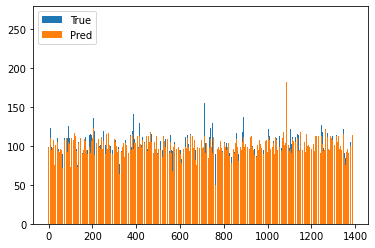

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()